Success
Success
Success
Success
Success
Success


C:\ProgramData\Anaconda3\lib\site-packages\skrf\calibration\calibration.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  abcTmp, residualsTmp = npy.linalg.lstsq(Q,m)[0:2]


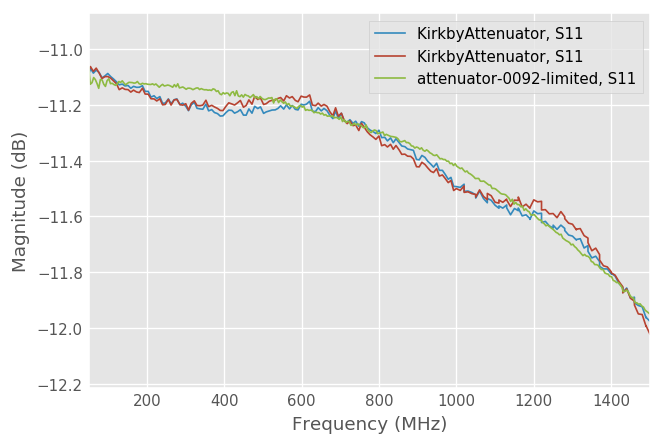

In [106]:
import skrf as rf
from skrf.calibration import OnePort
%matplotlib inline
from pylab import *
rf.stylely()

idealsPerfect = rf.read_all('data/ideals/')
idealsKirkby = rf.read_all('data/ideals/KirkbySN0092/')
measuredKirkby = rf.read_all('data/measured/SVA/KirkbySN0092/')
measuredSDRKits = rf.read_all('data/measured/SVA/SDRKits/')
duts = rf.read_all('data/measured/SVA/KirkbySN0092/')

## Calibrate based on Kirkby supplied data with measured data
cal_1 = rf.OnePort(
    ideals = [idealsKirkby[k] for k in ['male-short-0092','male-open-0092','male-load-0092']],
    measured = [measuredKirkby[k] for k in ['KirkbyShort','KirkbyOpen','KirkbyLoad']],
    )
## Calibrate based on Kirkby supplied data with measured data including Faked Short measurement
cal_2 = rf.OnePort(
    ideals = [idealsKirkby[k] for k in ['fake-male-short-0092','male-open-0092','male-load-0092']],
    measured = [measuredKirkby[k] for k in ['KirkbyShortOpen180','KirkbyOpen','KirkbyLoad']],
    )
## Calibrate based on Ideal OSL standards and SDR Kits standards. This one is poor as expected as the standards are not characterised
#cal_3 = rf.OnePort(
#    ideals = [idealsPerfect[k] for k in ['short','open','load']],
#    measured = [measuredSDRKits[k] for k in ['SDRKitsShort','SDRKitsOpen','SDRKitsLoad']],
#    )

caled_dutsKirkby = [cal_1.apply_cal(dut) for dut in duts.values()]
caled_dutsKirkbyFakeShort = [cal_2.apply_cal(dut) for dut in duts.values()]
#caled_dutsSDRKits = [cal_3.apply_cal(dut) for dut in duts.values()]

caled_dutsKirkby[0].plot_s_db(label='OSL Calibration')
caled_dutsKirkbyFakeShort[0].plot_s_db(label='Fake Short Calibration')
#caled_dutsSDRKits[0].plot_s_db()
idealsKirkby['attenuator-0092-limited'].plot_s_db(label='Reference measurement')
